<a href="https://colab.research.google.com/github/Ragnarok540/sympy-tutorial/blob/main/3_body_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# https://www.youtube.com/watch?v=otRtUiCcCh4
# https://www.youtube.com/watch?v=FXkH9-4EN_8

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from matplotlib import animation
from matplotlib.animation import PillowWriter

In [ ]:
m0 = 1.0
m1 = 1.0
m2 = 1.0

inital_position_0 =  [1.0,  0.0,  1.0]
inital_position_1 =  [1.0,  1.0,  0.0]
inital_position_2 =  [0.0,   1.0, 1.0]

inital_velocity_0 =  [0.0, 0.0, -1.0]
inital_velocity_1 =  [0.0, 0.0, 1.0]
inital_velocity_2 =  [0.0, 0.0, -0.6]

initial_conditions = np.array([
    inital_position_0, inital_position_1, inital_position_2,
    inital_velocity_0, inital_velocity_1, inital_velocity_2
]).ravel()

initial_conditions

array([ 1. ,  0. ,  1. ,  1. ,  1. ,  0. ,  0. ,  1. ,  1. ,  0. ,  0. ,
       -1. ,  0. ,  0. ,  1. ,  0. ,  0. , -0.6])

In [ ]:
def three_body(S, t):
    pos_0, pos_1, pos_2 = S[0:3], S[3:6], S[6:9]
    vel_0, vel_1, vel_2 = S[9:12], S[12:15], S[15:18]

    r01 = np.linalg.norm(pos_0 - pos_1)
    r02 = np.linalg.norm(pos_0 - pos_2)
    r12 = np.linalg.norm(pos_1 - pos_2)

    return np.array([
        vel_0,
        vel_1,
        vel_2,
        m2 * (pos_2 - pos_0) / r02**3 + m1 * (pos_1 - pos_0) / r01**3,
        m2 * (pos_2 - pos_1) / r12**3 + m0 * (pos_0 - pos_1) / r01**3,
        m0 * (pos_0 - pos_2) / r02**3 + m1 * (pos_1 - pos_2) / r12**3
    ]).ravel()

t = np.linspace(0, 10, 1001)

sol = odeint(three_body, y0=initial_conditions, t=t)

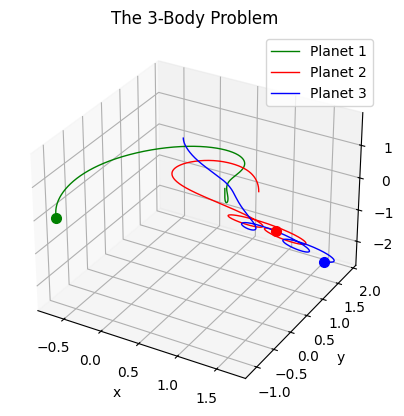

In [ ]:
p0x = sol.T[0]
p0y = sol.T[1]
p0z = sol.T[2]

p1x = sol.T[3]
p1y = sol.T[4]
p1z = sol.T[5]

p2x = sol.T[6]
p2y = sol.T[7]
p2z = sol.T[8]

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

planet0_plt, = ax.plot(p0x, p0y, p0z, 'green', label='Planet 0', linewidth=1)
planet1_plt, = ax.plot(p1x, p1y, p1z, 'red', label='Planet 1', linewidth=1)
planet2_plt, = ax.plot(p2x, p2y, p2z, 'blue',label='Planet 2', linewidth=1)

planet0_dot, = ax.plot([p0x[-1]], [p0y[-1]], [p0z[-1]], 'o', color='green', markersize=7)
planet1_dot, = ax.plot([p1x[-1]], [p1y[-1]], [p1z[-1]], 'o', color='red', markersize=7)
planet2_dot, = ax.plot([p2x[-1]], [p2y[-1]], [p2z[-1]], 'o', color='blue', markersize=7)

ax.set_title("The 3-Body Problem")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.grid()
plt.legend()
plt.show()

In [ ]:
def animate(i):
    lower_lim = max(0, i - 300)

    x_current_0 = p0x[lower_lim:i + 1]
    y_current_0 = p0y[lower_lim:i + 1]
    z_current_0 = p0z[lower_lim:i + 1]

    x_current_1 = p1x[lower_lim:i + 1]
    y_current_1 = p1y[lower_lim:i + 1]
    z_current_1 = p1z[lower_lim:i + 1]

    x_current_2 = p2x[lower_lim:i + 1]
    y_current_2 = p2y[lower_lim:i + 1]
    z_current_2 = p2z[lower_lim:i + 1]

    planet0_plt.set_data(x_current_0, y_current_0)
    planet0_plt.set_3d_properties(z_current_0)

    planet0_dot.set_data([x_current_0[-1]], [y_current_0[-1]])
    planet0_dot.set_3d_properties([z_current_0[-1]])

    planet1_plt.set_data(x_current_1, y_current_1)
    planet1_plt.set_3d_properties(z_current_1)

    planet1_dot.set_data([x_current_1[-1]], [y_current_1[-1]])
    planet1_dot.set_3d_properties([z_current_1[-1]])

    planet2_plt.set_data(x_current_2, y_current_2)
    planet2_plt.set_3d_properties(z_current_2)

    planet2_dot.set_data([x_current_2[-1]], [y_current_2[-1]])
    planet2_dot.set_3d_properties([z_current_2[-1]])


ani = animation.FuncAnimation(fig, animate, frames=range(0, len(t), 2), interval=10)
ani.save('three_body.gif', writer='pillow', fps=30)